# Movies Dataset - Analysing Using a Visual-Based Approach

## 1. Loading and Exploring the Movies Dataset

In [1]:
from vega_datasets import data
import numpy as np                # 1.26.4
import pandas as pd               # 2.2.2
import matplotlib.pyplot as plt   # 3.9.2
import seaborn as sns             # 0.13.2
import altair as alt              # 5.0.1

# Dataset information and preview
movies = data.movies()
print(movies.info())
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   3200 non-null   object 
 1   US_Gross                3194 non-null   float64
 2   Worldwide_Gross         3194 non-null   float64
 3   US_DVD_Sales            564 non-null    float64
 4   Production_Budget       3200 non-null   float64
 5   Release_Date            3201 non-null   object 
 6   MPAA_Rating             2596 non-null   object 
 7   Running_Time_min        1209 non-null   float64
 8   Distributor             2969 non-null   object 
 9   Source                  2836 non-null   object 
 10  Major_Genre             2926 non-null   object 
 11  Creative_Type           2755 non-null   object 
 12  Director                1870 non-null   object 
 13  Rotten_Tomatoes_Rating  2321 non-null   float64
 14  IMDB_Rating             2988 non-null   

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


First thing to note is that the `Release_Date` column is an "object" datatype. Hence, we should convert the column to a "datetime" datatype as this would better facilitate our analysis.

In [2]:
# Convert to datetime format
movies["Release_Date"] = pd.to_datetime(movies["Release_Date"])

From the tables above, we also see that some columns seem to have a lot of missing data. Let us size up how significant the issue is.

In [3]:
# Check for proportion of missing values for all columns
round(movies.isna().sum().sort_values(ascending=False) / len(movies), 3)

US_DVD_Sales              0.824
Running_Time_min          0.622
Director                  0.416
Rotten_Tomatoes_Rating    0.275
MPAA_Rating               0.189
Creative_Type             0.139
Source                    0.114
Major_Genre               0.086
Distributor               0.072
IMDB_Rating               0.067
IMDB_Votes                0.067
US_Gross                  0.002
Worldwide_Gross           0.002
Title                     0.000
Production_Budget         0.000
Release_Date              0.000
dtype: float64

- `US_DVD_Sales` and `Running_Time_min` columns seem to have a significantly high proportion of missing values (82.4% and 62.2%, respectively). Therefore, highly likely limited inference can be made from those attributes.
- `Director` column also seem to have a large proportion of missing values, although at least more than half of the observations have data.
- Interestingly, the ratings from the **Rotten Tomatoes** website has _significanly higher missing values_ (27.5%) compared to ratings from **IMDB** website (6.7%). Perhaps an indication of structural issues - either Rotten Tomates existed later than IMDB, or movies with certain characteristics are not covered in Rotten Tomatoes. Alternatively, it could be just due to unclean data entry.
- Other columns with more than 10% missing data values are `MPAA_Rating`, `Creative_Type`, and `Source`.

For the numerical columns, it is also good to see a summary of descriptive statistics to give a quick sense of the data distribution.

In [4]:
# Quick view of summary statistics of numerical columns
movies.describe()

,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,Running_Time_min,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
count,3.194000e+03,3.194000e+03,5.640000e+02,3.200000e+03,3201,1209.000000,2321.000000,2988.000000,2988.000000
mean,4.400209e+07,8.534340e+07,3.490155e+07,3.106917e+07,1998-12-06 23:41:06.354264192,110.193548,54.336924,6.283467,29908.644578
min,0.000000e+00,0.000000e+00,6.184540e+05,2.180000e+02,1928-12-31 00:00:00,46.000000,1.000000,1.400000,18.000000
25%,5.493221e+06,8.031285e+06,9.906211e+06,6.575000e+06,1996-09-20 00:00:00,95.000000,30.000000,5.600000,4828.500000
50%,2.201947e+07,3.116893e+07,2.033156e+07,2.000000e+07,2001-12-14 00:00:00,107.000000,55.000000,6.400000,15106.000000
75%,5.609176e+07,9.728380e+07,3.779422e+07,4.200000e+07,2005-12-16 00:00:00,121.000000,80.000000,7.200000,35810.500000
max,7.601676e+08,2.767891e+09,3.525821e+08,3.000000e+08,2046-12-31 00:00:00,222.000000,100.000000,9.200000,519541.000000
std,6.255531e+07,1.499473e+08,4.589512e+07,3.558591e+07,NaN,20.171014,28.076593,1.252290,44937.582335


- For the columns related to monetary values (i.e., `US_Gross`, `Worldwide_Gross`, `US_DVD_Sales`, `Production_Budget`), the median values are quite smaller than the mean values. They also have large standard deviation values. This suggests that the distribution for these data are right skewed, and may require some transformation such as using log values or ratios. Worth noting that the `US_Gross` and `Worldwide_Gross` columns have a minimum value of 0, which may have implications for log transformations.
- The `Release_Date` column has at least one entry in the future (December 2046) and at least one really old entry (December 1998)! This suggests some data quality issues, which we can either amend the values by doing a separate search and validation, drop the unrealistic observations or replace the values with some alternative.

For the non-numeric columns, it is also good to have a sense of unique values, as they could guide our analytical and visualisation approach.

In [5]:
# Quick view of summary statistics of non-numerical columns
movies.describe(include=["object"])

,Title,MPAA_Rating,Distributor,Source,Major_Genre,Creative_Type,Director
count,3200,2596,2969,2836,2926,2755,1870
unique,3176,7,174,18,12,9,550
top,Friday the 13th,R,Warner Bros.,Original Screenplay,Drama,Contemporary Fiction,Steven Spielberg
freq,2,1194,318,1536,789,1453,23


- Columns that could potentially be analysed using all unique values are `MPAA_Rating`, `Creative_Type`, `Major_Genre` and `Source`.
- Other columns have too many unique values, but perhaps can be grouped together (e.g., top 10 vs others). Even for the columns mentioned above, further grouping may be necessary if there are any similarities.

## 2. Pre-processing the Movies Dataset
Based on the observations noted above, several pre-processing steps are taken to address some of the issues highlighted. Some steps are also taken after some analysis of the data has been done, and documented here as well for ease of reference.

|Variable Names | Pre-processing Rules |
| :--- | :--- |
| _Pre-processing steps after prelim data exploration_ ||
| US_Gross | - Take the log values <br>- Bin into four bins |
| Worldwide_Gross | - Take the log values <br>- Bin into four bins |
| Production_Budget | - Take the log values <br>- Bin into six bins with increments of $50,000,000 |
| Worldwide_ROI | Worldwide_Gross / Production_Budget |
| Worldwide_Profit | **1** if ROI > 1, **0** otherwise |
| Release_Date | Create Month, Month_Year, Year, and Decade versions |
| _Processing steps taken after further visual analysis_ ||
| Y2K | **1** if Release_Date is year 2000 onwards, **0** otherwise |
| MPAA_Rating_Mod | Regroup MPAA_Rating categories <br>**G**: G <br>**PG**: PG <br>**R**: R, NC-17 <br>**Others**: Not Rated, Open |
| Major_Genre_Mod | Regroup Major_Genre categories <br>**Comedy**: Comedy, Black Comedy, Romantic Comedy <br>**Action/Adventure**: Action, Adventure <br>**Drama**: Drama <br>**Horror/Thriller**: Horror, Thriller/Suspense <br>**Others**: Musical, Concert/Performance, Western, Documentary |
| Rotten_Rating_Category | **Rotten** if rating <= 60% <br>**Fresh** if rating >60% <br>[Source](https://www.rottentomatoes.com/faq#:~:text=Why%20doesn't%20Rotten%20Tomatoes,criteria%20%2D%20see%20the%20criteria%20HERE)|

Let's also limit the period of analysis to January 1990 to December 2010, where data seems more reliable.

In [6]:
# Pre-processing steps taken after cursory data exploration.
movies["log_US_Gross"] = np.log(movies['US_Gross'])
movies["US_Gross_Category"] = pd.cut(movies['US_Gross'],
                                     bins=[0, 30000000, 100000000, 300000000, max(movies['US_Gross'])],
                                     labels=["Less than $30m", "\\$30m-$100m", "\\$100m-$300m", "More then $300m"]
                                    )

movies["log_Worldwide_Gross"] = np.log(movies['Worldwide_Gross'])
movies["Worldwide_Gross_Category"] = pd.cut(movies['Worldwide_Gross'],
                                            bins=[0, 30000000, 100000000, 300000000, max(movies['Worldwide_Gross'])],
                                            labels=["Less than $30m", "\\$30m-$100m", "\\$100m-$300m", "More then $300m"]
                                           )

movies["log_Production_Budget"] = np.log(movies['Production_Budget'])
movies["Production_Budget_Category"] = pd.cut(movies['Production_Budget'],
                                             bins=[0, 50000000, 100000000, 150000000, 200000000, 250000000, max(movies['Production_Budget'])],
                                             labels=["Less than $50m", "\\$50m-$100m", "\\$100m-$150m", "\\$150m-$200m", "\\$200m-$250m", "More than 250m"]
                                             )

movies["Worldwide_ROI"] = movies["Worldwide_Gross"] / movies["Production_Budget"]
movies["Worldwide_Profit"] = movies["Worldwide_ROI"] > 1

movies["Release_Month"] = movies["Release_Date"].dt.strftime('%Y-%m')
movies["Release_Year"] = movies["Release_Date"].dt.year
movies["Release_Decade"] = (movies["Release_Year"] // 10) * 10



# Processing steps taken after some analysis have been done.
### Create a dummy for movies released after 2000, seems like there was an explosion of movies around/post this period.
movies["Y2K"] = movies["Release_Year"] >= 2000

### Combine MPAA_Ratings since some are similar.
mpaa_ratings_mod_dict = {"G":"G",
                        "PG":"PG",
                        "R":"R", "NC-17": "R",
                        "Not Rated":"Others", "Open":"Others"
                        }
movies["MPAA_Rating_Mod"] = movies["MPAA_Rating"].map(mpaa_ratings_mod_dict)

### Combine some genres since some of the genres have minimal observations and can be clustered together.
genres_mod_dict = {"Drama": "Drama",
                   "Comedy": "Comedy", "Black Comedy": "Comedy", "Romantic Comedy": "Comedy",
                   "Action": "Action/Adventure", "Adventure": "Action/Adventure",
                   "Horror": "Horror/Thriller", "Thriller/Suspense": "Horror/Thriller",
                   "Concert/Performance": "Others", "Musical": "Others", "Western": "Others", "Documentary": "Others"
                  }
movies["Major_Genre_Mod"] = movies["Major_Genre"].map(genres_mod_dict)

### Create bins for ratings
movies["rotten_rating_category"] = pd.cut(movies["Rotten_Tomatoes_Rating"], bins=[0, 60, 100], labels=["rotten", "fresh"])

### Limit analysis to period January 1990 to December 2010.
movies_df = movies[(movies["Release_Year"] >= 1990) & (movies["Release_Year"] <= 2010)]

# Inspect the table.
movies_df.head()

/opt/anaconda3/envs/inm433_visual/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/inm433_visual/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,...,Production_Budget_Category,Worldwide_ROI,Worldwide_Profit,Release_Month,Release_Year,Release_Decade,Y2K,MPAA_Rating_Mod,Major_Genre_Mod,rotten_rating_category
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,1998-06-12,R,NaN,Gramercy,None,...,Less than $50m,0.018260,False,1998-06,1998,1990,False,R,NaN,NaN
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,1998-08-07,R,NaN,Strand,None,...,Less than $50m,0.036253,False,1998-08,1998,1990,False,R,Drama,NaN
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,1998-08-28,None,NaN,Lionsgate,None,...,Less than $50m,0.812536,False,1998-08,1998,1990,False,NaN,Comedy,NaN
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,1998-09-11,None,NaN,Fine Line,None,...,Less than $50m,1.245383,True,1998-09,1998,1990,False,NaN,Comedy,rotten
4,Slam,1009819.0,1087521.0,NaN,1000000.0,1998-10-09,R,NaN,Trimark,Original Screenplay,...,Less than $50m,1.087521,True,1998-10,1998,1990,False,R,Drama,fresh


## 3. Visual Analysis - Main submissions

### Plot 1

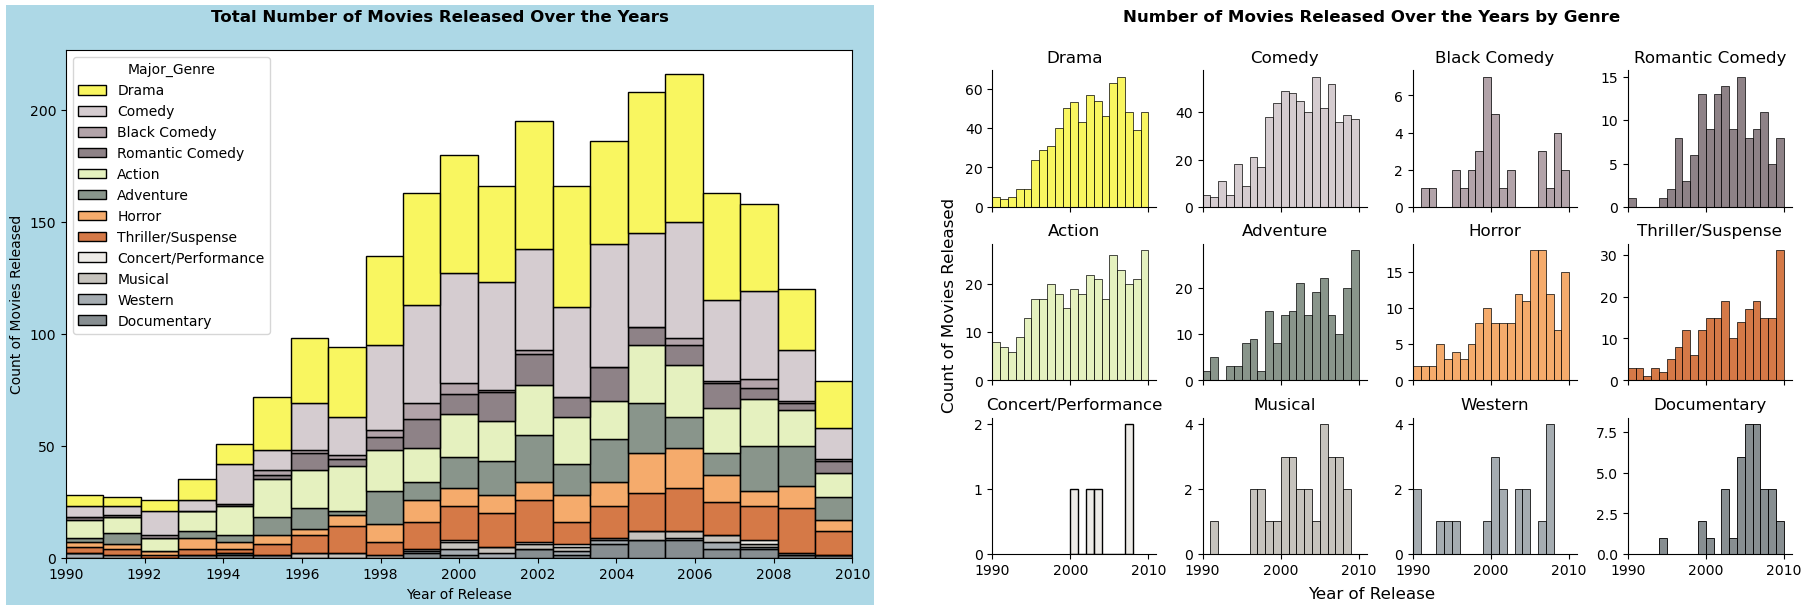

In [7]:
fig = plt.figure(layout="constrained", figsize=(18,6))
subfigs = fig.subfigures(1, 2, wspace=0.07)

# Create color palette
color_palette = ["#F8F32B", "#C7BCC1", "#99858D", "#69585F", "#DDEDAA", "#627264", "#F28F3B", "#C84C09", "#E7E5DF", "#B4AFA7", "#879197", "#5F686D"]

# Plot LHS graph
axs0 = subfigs[0].subplots(1, 1)
sns.histplot(ax=axs0,
             data=movies_df, x="Release_Year",
             hue='Major_Genre', hue_order=genres_mod_dict.keys(), palette=color_palette, multiple='stack',
             bins=21)
axs0.set_ylabel('Count of Movies Released')
axs0.set_xlabel('Year of Release')
axs0.set_xlim(1990,2010)
axs0.set_xticks(range(1990,2011,2))
subfigs[0].set_facecolor('lightblue')
subfigs[0].suptitle('Total Number of Movies Released Over the Years\n', weight='heavy')


# Plot RHS graphs
axs1 = subfigs[1].subplots(3, 4)
subfigs[1].suptitle('Number of Movies Released Over the Years by Genre\n', weight='heavy')
subfigs[1].supxlabel('Year of Release')
subfigs[1].supylabel('Count of Movies Released')
i=0
for genre in genres_mod_dict.keys():
    try:
        sns.histplot(ax=axs1[0,i],
                   data=movies_df[movies_df["Major_Genre"] == genre], x="Release_Year", binwidth=1, color=color_palette[i])
        axs1[0,i].set_title(genre)
        axs1[0,i].set(xticklabels=[])
        axs1[0,i].set_xlim(1990,2011)
        axs1[0,i].set_xlabel('')
        axs1[0,i].set_ylabel('')
        sns.despine(ax=axs1[0,i])
        i += 1
    except:
        try:
            sns.histplot(ax=axs1[1,i-4],
                       data=movies_df[movies_df["Major_Genre"] == genre], x="Release_Year", binwidth=1, color=color_palette[i])
            axs1[1,i-4].set_title(genre)
            axs1[1,i-4].set(xticklabels=[])
            axs1[1,i-4].set_xlim(1990,2011)
            axs1[1,i-4].set_xlabel('')
            axs1[1,i-4].set_ylabel('')
            sns.despine(ax=axs1[1,i-4])
            i += 1
        except:
            sns.histplot(ax=axs1[2,i-8],
                       data=movies_df[movies_df["Major_Genre"] == genre], x="Release_Year", binwidth=1, color=color_palette[i])
            axs1[2,i-8].set_title(genre)
            axs1[2,i-8].set_xlim(1990,2011)
            axs1[2,i-8].set_xlabel('')
            axs1[2,i-8].set_ylabel('')
            sns.despine(ax=axs1[2,i-8])
            i += 1

#plt.savefig("AR_movies_count_years_genre.png")
plt.show()

- **Purpose**: Compare the trend of number of movies released across 20 years by genre.
- **Justification**: Given that the focus of the visualisation is the trend of movies released and aligned length is the most effective visual channel for comparison, hence the vertical spatial position channel encodes the number of movies released. This makes the information more salient and easier to compare across the different years. The data is aggregated annually to improve the readability of the chart as it smoothens noise that could be present at the more granular monthly level at the cost of losing information on any monthly cyclical trends. The genre variable is encoded via the colour hue channel, which is an effective identity channel to differentiate between the different genres. Additionally, although the value channel is better used for numerical variables, here it is used as a secondary channel on top of hue to indicate genres that are similar to each other (e.g., “Comedy”, “Black Comedy”, and “Romantic Comedy”). Following Shneiderman’s (1996) mantra and potential occlusion of data, both an overview chart and genre-specific charts are visualised by partitioning the visual space into two halves. The left side visual space shows the overall trend with the genres differentiated by colour and stacked on top of each other – the length of each colour encodes the number of movies released annually for each genre thus facilitating comparison of the magnitude between each genre for each year. However, because of unaligned length and occlusion due to small number of observations, temporal comparison within each genre is difficult. Hence, the right side visual space similarly plots time histograms but with independent plots for each genre, which allows for better temporal comparison for each genre. The colours for each genre on both sides of the visualisation are standardised to ease association and interpretation. Genres that were coded with value to indicated similarity were also plot near to each other to emphasise the association with each other. To indicate that the left and right side of the visual space are different, the overall chart on the left has a coloured background to emphasise the contrast.
- **Interpretation**: The overall chart on the left shows a sharp increase in the number of movies released from 1990 up to 2000, after which the growth rate plateaued, suggesting a structural break around the turn of the millennium. Hence, further analysis could explore if there exist any differential patterns before and after the break. The strong growth pre-2000 could be due to the spread of internet and increasing globalisation, thus resulting in: i) higher demand for movies (organic growth); and/or ii) improvements in data collection and curation (technical growth). Although the composition of movies released is always dominated (and hence the main drive of overall growth) by the drama and comedy genres, the charts on the right show that almost all the genres noted the same growth trend, albeit from different bases. Apart from trend analysis, the charts can also provide suggestions for further data transformation. From the overall chart on the left, we see that within the “comedy” umbrella (shades of dark maroon), the main “Comedy” genre dominates, while “Romantic Comedy” and “Black Comedy” are noticeably lesser. Given the smaller observations of the other two sub-groups and the potentially subjective nature of classification, there is merit to combine the genres into a single category for further analysis. Similarly, the “Horror” genre has minimal observations and can be argued to be similar to the “Thriller/Suspense” genre (shades of orange). Meanwhile, the low number of titles in “Documentary” and “Musical” raises question on the data collection/curation process and data capture, as it is unlikely total documentaries and musical films are that low globally. Furthermore, given the sparseness of data in the genres on the bottom row on the right side of the visual space, there may be merit in combining the observations into a single “Others” genre.


### Plot 2

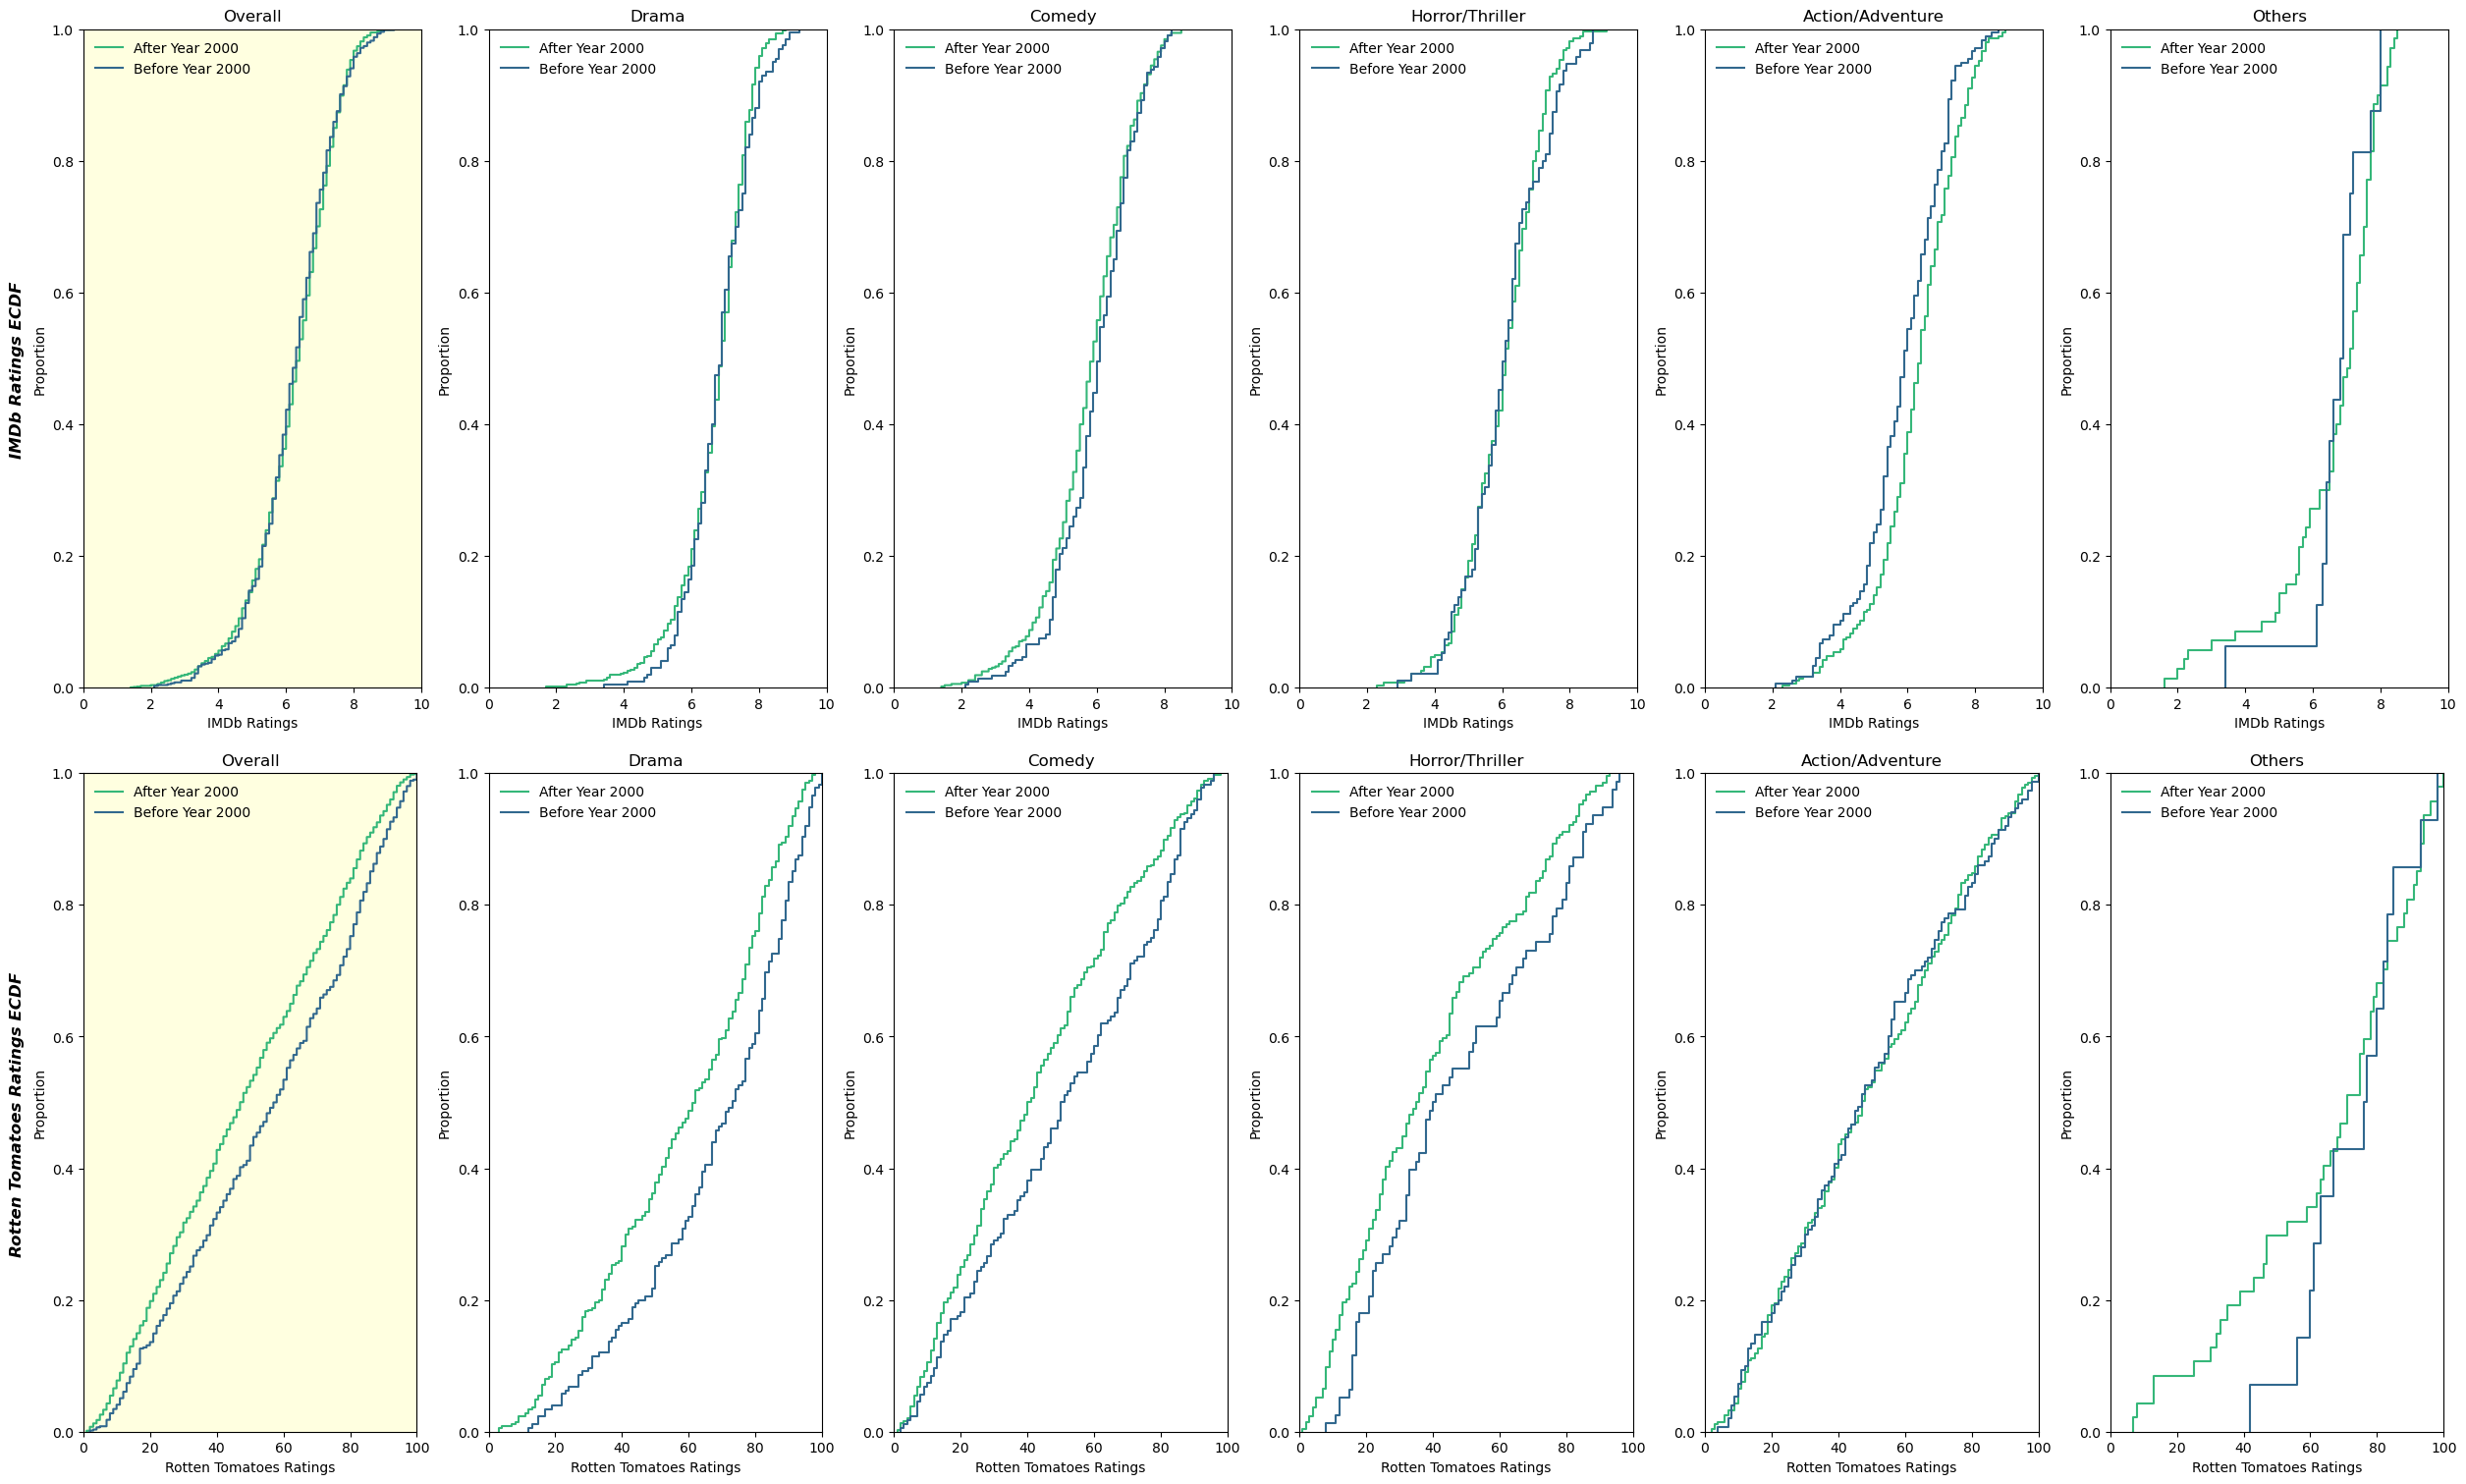

In [8]:
fig2 = plt.figure(layout="constrained", figsize=(25,15))
subfigs2 = fig2.subfigures(2, 1, wspace=0.5)
subfigs2[1].supylabel('Rotten Tomatoes Ratings ECDF', style='oblique', weight='heavy')
subfigs2[0].supylabel('IMDb Ratings ECDF', style='oblique', weight='heavy')


# Plot bottom graphs - Rotten Tomatoes
c2_0 = subfigs2[1].subplots(1,6)
c2_0[0].set_facecolor('lightyellow')
sns.ecdfplot(ax=c2_0[0], data=movies_df, x='Rotten_Tomatoes_Rating', hue='Y2K', palette='viridis')
c2_0[0].set_title('Overall')
c2_0[0].set_xlabel('Rotten Tomatoes Ratings')
c2_0[0].set_xlim(0,100)
c2_0[0].legend(labels=["After Year 2000", "Before Year 2000"], frameon=False)

j=1
for genre in movies_df['Major_Genre_Mod'].dropna().unique():
    sns.ecdfplot(ax=c2_0[j], data=movies_df[movies_df['Major_Genre_Mod']==genre], x='Rotten_Tomatoes_Rating', hue='Y2K', palette='viridis')
    c2_0[j].set_title(genre)
    c2_0[j].set_xlabel('Rotten Tomatoes Ratings')
    c2_0[j].set_xlim(0,100)
    c2_0[j].legend(labels=["After Year 2000", "Before Year 2000"], frameon=False)
    j += 1


# Plot top graphs - IMDB
c2_1 = subfigs2[0].subplots(1,6)
c2_1[0].set_facecolor('lightyellow')
sns.ecdfplot(ax=c2_1[0], data=movies_df, x='IMDB_Rating', hue='Y2K', palette='viridis')
c2_1[0].set_title('Overall')
c2_1[0].set_xlabel('IMDb Ratings')
c2_1[0].set_xlim(0,10)
c2_1[0].legend(labels=["After Year 2000", "Before Year 2000"], frameon=False)

j=1
for genre in movies_df['Major_Genre_Mod'].dropna().unique():
    sns.ecdfplot(ax=c2_1[j], data=movies_df[movies_df['Major_Genre_Mod']==genre], x='IMDB_Rating', hue='Y2K', palette='viridis')
    c2_1[j].set_title(genre)
    c2_1[j].set_xlabel('IMDb Ratings')
    c2_1[j].set_xlim(0,10)
    c2_1[j].legend(labels=["After Year 2000", "Before Year 2000"], frameon=False)
    j += 1
    
#plt.savefig("AR_movies_ratings_dist.png")
plt.show()

- **Purpose**: Compare the distribution of IMDb and Rotten Tomatoes Ratings before and after the year 2000 by genre.
- **Justification**: Given potential occlusion issues for scatterplots and binning bias for histograms, the empirical cumulative distribution function (ECDF) charts were plotted to compare the distributions. For an ECDF chart, the horizontal spatial space encodes the ratings and vertical spatial space encodes the percentiles, while the line mark is used to plot the observations ordered in increasing rating. The colour channel is used to differentiate observations before and after the year 2000, where there is some evidence of a structural break in the data. The visual space itself is divided into two main areas – the upper half plots the distribution of the Rotten Tomatoes ratings while the bottom half plots the distribution of the IMDb ratings. Each half is divided into six columns – the first column plots the overall ratings distributions while the remaining columns plots the distribution by the transformed genre category, where similar genres (such as Comedy, Black Comedy and Romantic Comedy) are grouped together. A coloured background is implemented for the overall chart to contrast it against the charts by genre, thus emphasising that the chart is separate from the rest. Despite having different rating scales, it is possible to visually compare the different distributions between Rotten Tomatoes and IMDb given that the plots have the same width, and the ratings are a linear scaling of each other.
- **Interpretation**: For IMDb ratings, the ECDF curves remain similar for both pre- and post-2000 except for the “Others” genre, which suggests that there is limited evidence of a structural break. The difference in the “Others” genre could be due to small sample size and variation in the underlying genre (a combination of “Concert/Performance”, “Musical”, “Western” and “Documentary” genres). The curves are also very steep in the middle, indicating that movie ratings are concentrated within a narrow band (approximately within the range of 4 to 8 rating scores). For Rotten Tomatoes ratings, there is a visible difference in the distributions of almost all the curves between the two time periods, which suggests a structural break in the underlying data. The curves mostly shift to the left, indicating an increase in the proportion of lower-rated films. The slopes of the curves are also closer to a straight line, indicating that movie ratings are more evenly distributed across the ratings scale. One possible reason for the difference is that IMDb ratings are purely crowd-sourced thus susceptible to herd mentality as well as reference point bias, while Rotten Tomatoes ratings are moderated by professional critics to some extent, hence can be argued to be more objective.

### Plot 3

In [9]:
# Create a director-level table of attributes.
movies_director_df = movies_df.groupby("Director").agg(
    total_movies = pd.NamedAgg(column="Title", aggfunc="count"),
    US_Gross_mean = pd.NamedAgg(column="US_Gross", aggfunc="mean"),
    US_Gross_median = pd.NamedAgg(column="US_Gross", aggfunc="median"),
    log_US_Gross_mean = pd.NamedAgg(column="log_US_Gross", aggfunc="mean"),
    log_US_Gross_median = pd.NamedAgg(column="log_US_Gross", aggfunc="median"),
    Worldwide_Gross_mean = pd.NamedAgg(column="Worldwide_Gross", aggfunc="mean"),
    Worldwide_Gross_median = pd.NamedAgg(column="Worldwide_Gross", aggfunc="median"),
    log_Worldwide_Gross_mean = pd.NamedAgg(column="log_Worldwide_Gross", aggfunc="mean"),
    log_Worldwide_Gross_median = pd.NamedAgg(column="log_Worldwide_Gross", aggfunc="median"),
    Production_Budget_mean = pd.NamedAgg(column="Production_Budget", aggfunc="mean"),
    Production_Budget_median = pd.NamedAgg(column="Production_Budget", aggfunc="median"),
    log_Production_Budget_mean = pd.NamedAgg(column="log_Production_Budget", aggfunc="mean"),
    log_Production_Budget_median = pd.NamedAgg(column="log_Production_Budget", aggfunc="median"),
    Worldwide_ROI_mean = pd.NamedAgg(column="Worldwide_ROI", aggfunc="mean"),
    Worldwide_ROI_median = pd.NamedAgg(column="Worldwide_ROI", aggfunc="median"),
    Worldwide_Profit = pd.NamedAgg(column="Worldwide_Profit", aggfunc="sum"),
    Rotten_Tomatoes_Rating_mean = pd.NamedAgg(column="Rotten_Tomatoes_Rating", aggfunc="mean"),
    Rotten_Tomatoes_Rating_median = pd.NamedAgg(column="Rotten_Tomatoes_Rating", aggfunc="median"),
    IMDB_Rating_mean = pd.NamedAgg(column="IMDB_Rating", aggfunc="mean"),
    IMDB_Rating_median = pd.NamedAgg(column="IMDB_Rating", aggfunc="median")
).reset_index()

movies_director_df["Worldwide_Profit_prop"] = movies_director_df["Worldwide_Profit"] / movies_director_df["total_movies"]

In [10]:
### Plot the LHS chart of joint distributions
lhs = alt.Chart(movies_director_df, title=alt.Title("Joint Distribution of Productivity Attributes of Movie Directors", dy=-15)).mark_point(filled=True).encode(
    alt.X("Production_Budget_median:Q").title("Median Production Budget"),
    alt.Y("Worldwide_Gross_median:Q").title("Median Worldwide Gross"),
    alt.Size("total_movies").legend(title="Number of Movies Released", orient='bottom'),
    alt.Color("Worldwide_Profit_prop", scale=alt.Scale(domainMid=0.5, scheme='redblue')).legend(title="Proportion of Profitable Movies", orient='bottom'),
    alt.OpacityValue(0.7),
    tooltip = [alt.Tooltip("Director"),
               alt.Tooltip("total_movies"),
               alt.Tooltip("Worldwide_Profit_prop")]
).properties(
    width=350,
    height=350
)



### Plot the RHS charts of marginal distributions
rhs1 = alt.Chart(movies_director_df, title=alt.Title("Median Production Budget", fontSize=11)).mark_bar().encode(
    alt.X("Production_Budget_median:Q").bin(maxbins=50).title(""),
    alt.Y('count()', axis=alt.Axis(title="Number of Directors", titleFontSize=9))
).properties(
    width=200,
    height=130
)

rhs2 = alt.Chart(movies_director_df, title=alt.Title("Median Worldwide Gross", fontSize=11)).mark_bar().encode(
    alt.X("Worldwide_Gross_median:Q").bin(maxbins=50).title(""),
    alt.Y('count()', axis=alt.Axis(title="Number of Directors", titleFontSize=9))
).properties(
    width=200,
    height=130
)

rhs3 = alt.Chart(movies_director_df, title=alt.Title("Proportion of Profitable Movies", fontSize=11)).mark_bar().encode(
    alt.X("Worldwide_Profit_prop:Q").bin(maxbins=10).title(""),
    alt.Y('count()', axis=alt.Axis(title="Number of Directors", titleFontSize=9))
).properties(
    width=200,
    height=130
)

rhs4 = alt.Chart(movies_director_df, title=alt.Title("Total Movies Released", fontSize=11)).mark_bar().encode(
    alt.X("total_movies:O").bin(maxbins=10).title(""),
    alt.Y('count()', axis=alt.Axis(title="Number of Directors", titleFontSize=9))
).properties(
    width=200,
    height=130
)



### Concatenate the charts
rhs_1 = alt.vconcat(rhs1, rhs2, spacing=30)
rhs_2 = alt.vconcat(rhs3, rhs4, spacing=30)
rhs = alt.hconcat(rhs_1, rhs_2, title=alt.Title("Marginal Distribution of Productivity Attributes of Movie Directors", anchor='middle', dy=-10))

alt.hconcat(lhs, rhs, spacing = 100, center=True)

/opt/anaconda3/envs/inm433_visual/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

- **Purpose**: To explore director-level productivity attributes and identify any relationships and/or outliers.
- **Justification**: The visual space is partitioned into two main spaces. The left side of the visual space plots the joint distribution of the productivity attributes of the directors. Each director is encoded as a point mark. Given that the main criteria of productivity is judged by the rate of return on investment (ROI), this information is made salient by utilising the spatial position channel, with the horizontal spatial position encoding the median production budget of movies released for each director and the vertical spatial position encoding the median worldwide movie revenue for each director. ROI ratio was not calculated nor any binning was done to preserve the granularity of the data, as different budgets may exhibit different patterns. Log transformation was explored but did not help with reducing occlusion of data, thus raw data is used to preserve legibility. Secondly, directors’ productivity is also be judged by the number of movies released, and this is encoded via the size channel to effectively show the different magnitudes as there are only 13 categories. Another metric to measure the productivity of directors is by assessing the proportion of profitable movies that were released for each director. This attribute was encoded in the colour channel using a diverging colour scale, with 50% being the midpoint. Directors with below 50% of movies with losses are encoded with hues of red to indicate underperformance, while above 50% are encoded with blue to indicate above average performance. To somewhat mitigate the issue of occlusion and provide further insights, the right side of the visual space plots the marginal distribution of each of the attributes. Ideally, the visual space would also include user interactions, where users could hover the different point marks and a tooltip could show relevant statistics for each director. This could also translate into a coordinated multiple view visual, where hovering above a certain point mark in the left chart would highlight the position of the mark in the left distributional charts. It is also worth noting that the occlusion occuring in the lower left side of the chart could be improved if we had removed outliers. However, this visualisation assumes this is the first iteration of the chart, hence it could be considered best practice to see the data in totality before zooming in.
- **Interpretation**: Most directors have at least half of their movies released that are profitable, shown by the prevalence of blue bubbles in the left chart and verified by the histogram on the right chart. For directors that have released loss-making movies, their median production budget is below $80 million as shown by the cluster of red points across the x-axis. Directors that only released loss-making movies (dark red points) tend to only have one or two movies released. We can also see some evidence of a positive correlation between the number of movies released with both the median production budget and median worldwide gross amount. While this may imply directors with more movies released tend to be more successful, we also need to take into account survivorship bias – only directors that started out with profitable movies may end up getting more movies released. Additionally, directors that have high median worldwide gross tend to have less than six movies released, suggesting a focus on quality instead of quantity. Further areas that would be interesting to explore is the characteristics of these different directors, however this goes beyond the data available in the dataset.


***

## Appendix: Visual Analysis - Other visualisation explorations

This section contains some of the other visuals within the visual space that was explored, but didn't make the final submission for various reasons. Nonetheless, some of the visuals may be useful for other projects, hence compiling them here for posterity and reference.

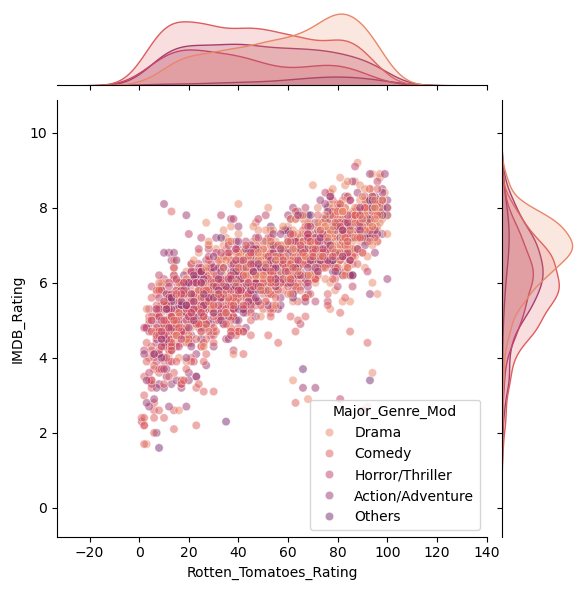

In [11]:
sns.jointplot(data=movies_df, x='Rotten_Tomatoes_Rating', y='IMDB_Rating', hue='Major_Genre_Mod', alpha=0.5, palette='flare',
              marginal_kws=dict(alpha=0.2, common_norm=True, palette='flare'))
plt.show()

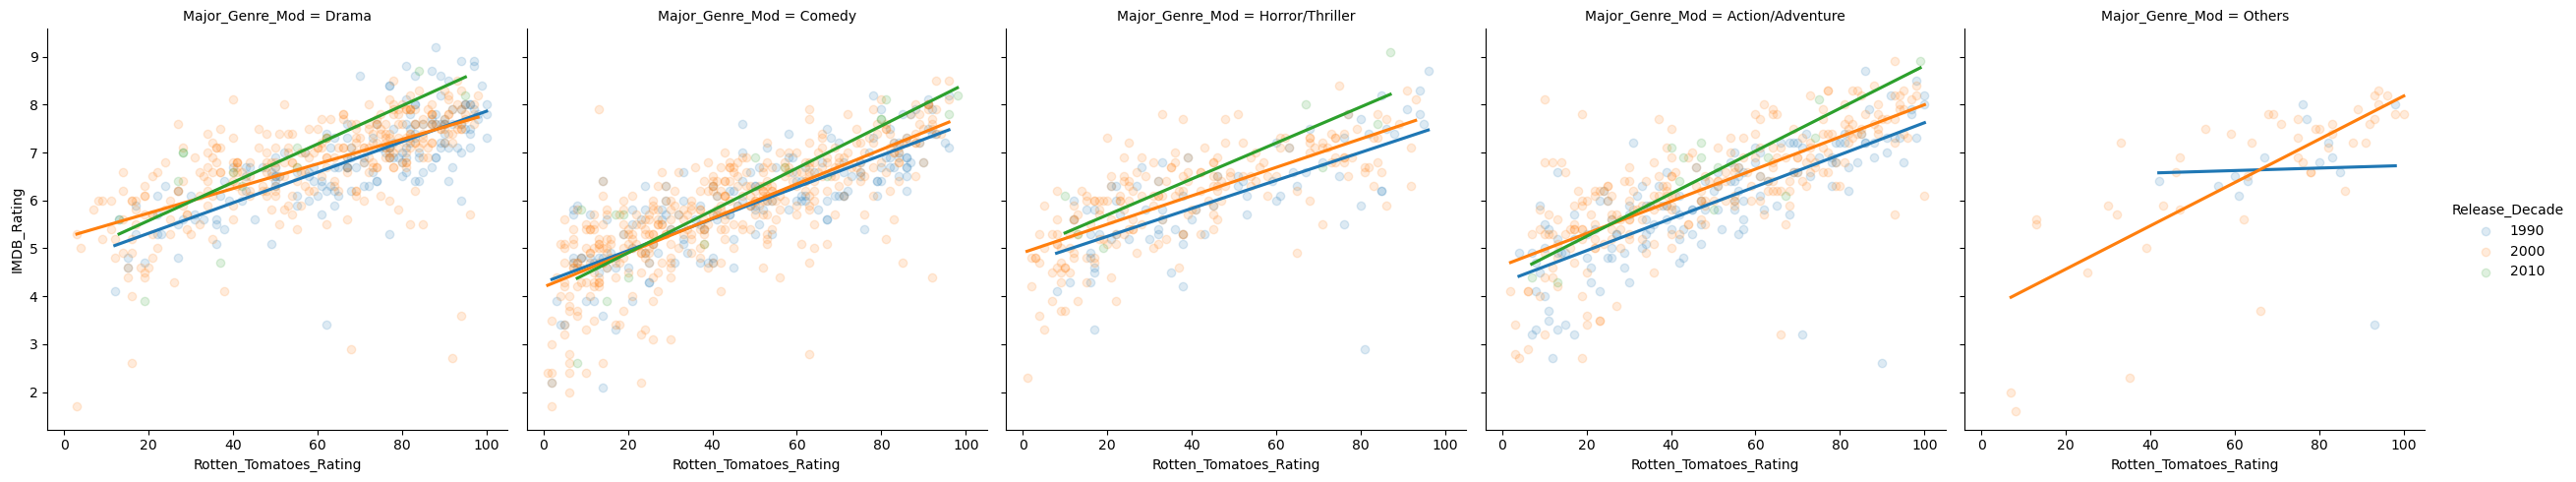

In [12]:
sns.lmplot(data=movies_df, x="Rotten_Tomatoes_Rating", y="IMDB_Rating",
           col="Major_Genre_Mod", hue="Release_Decade",
           ci=None,
           scatter_kws={'alpha':0.15})
plt.show()

In [13]:
alt.Chart(movies_director_df).mark_point(filled=True).encode(
    alt.X("Production_Budget_median:Q"),
    alt.Y("Rotten_Tomatoes_Rating_median:Q"),
    alt.Size("total_movies").legend(title="Total Movies Released", orient="bottom"),
    alt.Color("Worldwide_Profit_prop", scale=alt.Scale(domainMid=0.5, scheme='redblue')).legend(orient="bottom"),
    alt.OpacityValue(0.7)
).properties(
    width='container',
    height=300
)

/opt/anaconda3/envs/inm433_visual/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)